# The Anscombe's Quartet Dataset

The purpose of this Jupyter notebook is to anaylse Anscombe's quartet datasets. There are four tasks to be carried out in this notebook:

1. Explain the background to the dataset – who created it, when it was created, and any speculation you can ﬁnd regarding how it might have been created.
2. Plot the interesting aspects of the dataset
3. Calculate the descriptive statistics of the variables in the dataset. 
4. Explain why the dataset is interesting, referring to the plots and statistics above.

## Background

The proverb “A picture is worth 1000 words” is one you have probably heard more than once. A picture can also be worth 1000 data points. [[Natalia]( http://natalia.dbsdataprojects.com/2016/02/29/anscombes-quartet/)]

The Anscombe's Quartet Dataset was created by Francis John Anscombe. These were the subjects of a 1973 paper in “The American Statistician”. He wrote a paper about the importance of actually graphing your data, and not just depending on statistical analysis. 

He created four sets of XY data pairs, each with identical average X, average Y, variance in X and Y, mean X and Y, linear regression slope and intercept, and even correlation coefficients and RMSE values. In other words, these data sets seemed to be about the same—until they are graphed. [[Vernier](https://www.vernier.com/innovate/anscombes-quartet/)]

Graphs may not be as precise as statistics, but they provides a unique view onto data that can make it much easier to discover interesting structures than numerical methods. Graphs also provides the context necessary to make better choices and to be more careful when fitting models. Anscombe’s Quartet is a case in point, showing that four datasets that have identical statistical properties can indeed be very different [[Rstudio](https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html)]

<img src="https://upload.wikimedia.org/wikipedia/en/d/d5/Francis_Anscombe.jpeg">

## Plotting the Datasets

We import all necessary libraries to analysis Anscombe's Quartet Dataset. These can be seen below:

In [10]:
# Import the necessary libraires for this notebook
import pandas as pd # Data Manipulation
import numpy as np # Summary Statistics
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
from scipy import stats # Linear Regression

We upload the Anscombe's Quartet Datasets from a excel csv file of the four datasets each containing 11 lines of two variables  X and Y. 

In [71]:
# load the example dataset for Anscombe's quartet
df = pd.read_csv('anscombe.csv', dtype='float')
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


#### Mean of X and Y

In [85]:
# Print the mean of X and Y
print("Mean of X and Y")
print(np.round(df.mean(), decimals=3))

Mean of X and Y
x1    9.000
y1    7.501
x2    9.000
y2    7.501
x3    9.000
y3    7.500
x4    9.000
y4    7.501
dtype: float64


The mean of X is 9.00 for each dataset.

The mean of Y is 7.50 for each dataset.

In [83]:
# Print the standard deviation of X and Y
print("Standard Deviation of X and Y")
print(np.round(df.std(), decimals=3))

Standard Deviation of X and Y
x1    3.317
y1    2.032
x2    3.317
y2    2.032
x3    3.317
y3    2.030
x4    3.317
y4    2.031
dtype: float64


The standard deviation of X is 3.317 for each dataset

The standard deviation of Y is 2.031 for each dataset

In [80]:
# Print the variance of X and Y
print("The Variance of X and Y")
print(np.round(df.var(), decimals=3))

The Variance of X and Y
x1    11.000
y1     4.127
x2    11.000
y2     4.128
x3    11.000
y3     4.123
x4    11.000
y4     4.123
dtype: float64


The variance of X is 11.0 for each dataset.

The variance of Y is 4.12 for each dataset.

In [88]:
# print the coeffincent correlation of X and Y
print("The Correlation of X and Y")
print(np.round(df.corr(), decimals=3))

The Correlation of X and Y
       x1     y1     x2     y2     x3     y3     x4     y4
x1  1.000  0.816  1.000  0.816  1.000  0.816 -0.500 -0.314
y1  0.816  1.000  0.816  0.750  0.816  0.469 -0.529 -0.489
x2  1.000  0.816  1.000  0.816  1.000  0.816 -0.500 -0.314
y2  0.816  0.750  0.816  1.000  0.816  0.588 -0.718 -0.478
x3  1.000  0.816  1.000  0.816  1.000  0.816 -0.500 -0.314
y3  0.816  0.469  0.816  0.588  0.816  1.000 -0.345 -0.155
x4 -0.500 -0.529 -0.500 -0.718 -0.500 -0.345  1.000  0.817
y4 -0.314 -0.489 -0.314 -0.478 -0.314 -0.155  0.817  1.000


The correlation between x1 and y1 is 0.816 for each dataset. The same applies to X2 nad Y2 etc.. A valuable numerical measure of association between two variables is the correlation coefficient, which is a value between -1 and 1 indicating the strength of the association of the observed data for the two variables. (stat). At .816 there is a strong relationship between the two variables X and Y

In [93]:
# Print each dataset in table format stating the min, max and mean as well as other relevant data
anscombe = sns.load_dataset("anscombe")
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

This table contains data for each dataset and includes count, mean and standard deviation. It also includes min and max numbers and other data in between.

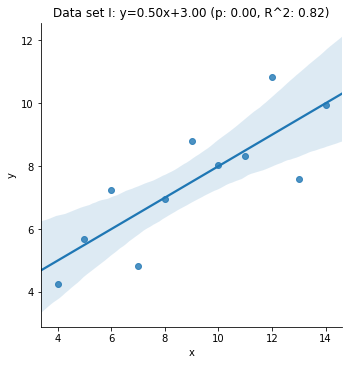

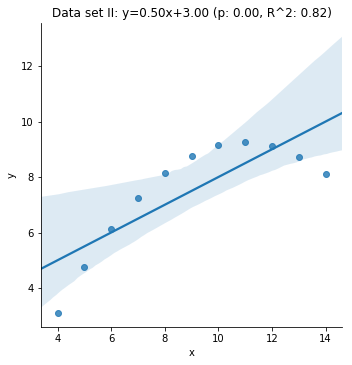

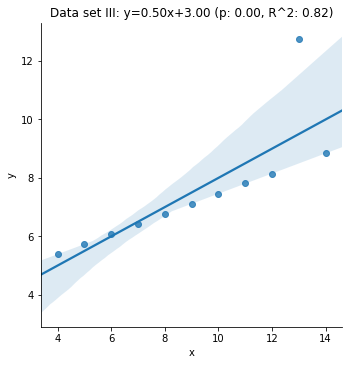

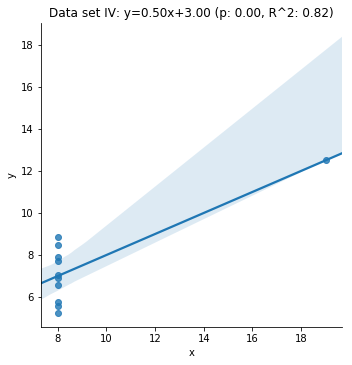

In [94]:
# Show the results of a linear regression within each dataset
for data_set in anscombe.dataset.unique():
     df = data.query("dataset == '{}'".format(data_set))
     slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x=df.x, y=df.y)
     sns.lmplot(x="x", y="y", data=df);
     plt.title("Data set {}: y={:.2f}x+{:.2f} (p: {:.2f}, R^2: {:.2f})".format(data_set, slope, intercept, p_val, r_val))
     plt.show()


Each dataset has a lingear regression (line of best fit) of y = 0.5x + 3. A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0) (stat)

## Descriptive statistics of the variables 

We are after analysing Anscombe quartet dataset and found that each dataset has identical mean, varance, stanard deviation and other identical data but with the same information each dataset has completely different graphs. 

Dataset I looks like a simple linear regression models. Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable (stat)

Dataset II has the same summary statistics shows a curvilinear relation model.(jerry). This model has a type of relationship between two variables where as one variable increases, so does the other variable, but only up to a certain point, after which, as one variable continues to increase, the other decreases. (alleydog)

Dataset III the distribution is linear, but with a different regression line, which is offset by the one outlier which exerts enough influence to alter the regression line and lower the correlation coefficient from 1 to 0.816 (natalia). After a regression line has been computed for a group of data, a point which lies far from the line (and thus has a large residual value) is known as an outlier(stat)

Dataset IV shows on outliner is enough a high correlation coefficient, even though the relationship between the two variables is not linear. (natalia) The regression equation is determined entriely  by the single observation at x=19. 

## Linear Regression

Anscombe who helped computerize statistical analyses while seeking to avoid flawed interpretations of such data. In using computers to analyze statistical data, he drew on his expertise in the sampling of inspections for industrial quality control, the philosophical foundations of probability and the analysis of variance. (NY Times)



Least-Squares Regression
The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values (stat)

## References

1. https://www.vernier.com/innovate/anscombes-quartet/

2. http://www.jerrydallal.com/lhsp/anscombe.htm

3. https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html

4. http://natalia.dbsdataprojects.com/2016/02/29/anscombes-quartet/

5. https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html

6. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

7. https://www.alleydog.com/glossary/definition.php?term=Curvilinear+Relationship